In [1]:
!pip install Palettable


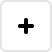
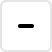
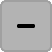
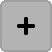
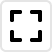
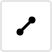
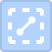
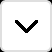
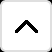
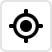

In [2]:
import numpy as np
from osgeo import gdal

from lets_plot import *
LetsPlot.setup_html()

In [3]:
ds=gdal.Open('DEM.asc')
gt = ds.GetGeoTransform()
print(gt)

(319370.82896, 91.66670000000005, 0.0, 5240788.834227, 0.0, -91.66670000000005)


In [4]:
Zarray=ds.ReadAsArray()
print(np.shape(Zarray))

(180, 98)


## 1
Now using `imshow()` we can plot the array. Since we are plotting an array, the origin is on the upper left corner. The image is shown rows and lines coordinates.


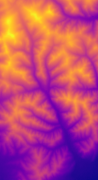

In [5]:
ggplot() + geom_imshow(Zarray, cmap="plasma")

## 2
Then we can calculate the bounding box (min, max, min, ymax) and use it in `imshow()` such as

In [6]:
nbx=np.shape(Zarray)[1]
nby=np.shape(Zarray)[0]
xmin=gt[0]
xmax=xmin+(gt[1]*nbx)    
ymax=gt[3]    
ymin=ymax+(gt[5]*nby) 

limsbox=[xmin,xmax,ymin,ymax]


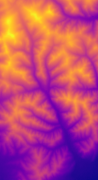

In [7]:
ggplot() + geom_imshow(Zarray, cmap="plasma", extent=limsbox)

Now, the image "has moved" toward this new reference and we can plot any point with coordinates corresponding to this bounding box


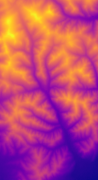

In [8]:
ggplot() + geom_imshow(Zarray, cmap="plasma", extent=limsbox) + \
    geom_point(x=325000, y=5233400, color="white", size=4)